# Sales Data Analysis of an Online Retail Store

## 1. Import Required Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the Dataset

In [27]:
df = pd.read_csv('synthetic_online_retail_data.csv')

In [28]:
df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


## 3. Basic Info and Cleaning

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     721 non-null    int64         
 1   order_date      721 non-null    datetime64[ns]
 2   product_id      721 non-null    int64         
 3   category_id     721 non-null    int64         
 4   category_name   721 non-null    object        
 5   product_name    721 non-null    object        
 6   quantity        721 non-null    int64         
 7   price           721 non-null    float64       
 8   payment_method  721 non-null    object        
 9   city            721 non-null    object        
 10  review_score    721 non-null    float64       
 11  gender          721 non-null    object        
 12  age             721 non-null    int64         
 13  total_price     721 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory us

In [42]:
df.shape

(721, 14)

In [43]:
print("\nMissing values: \n", df.isnull().sum())


Missing values: 
 customer_id       0
order_date        0
product_id        0
category_id       0
category_name     0
product_name      0
quantity          0
price             0
payment_method    0
city              0
review_score      0
gender            0
age               0
total_price       0
dtype: int64


In [44]:
df = df.dropna()

In [45]:
df = df.drop_duplicates()

In [46]:
df['order_date'] = pd.to_datetime(df['order_date'])

## 4. Feature Engineering

In [49]:
df['total_price'] = df['quantity'] * df['price']

In [54]:
df['review_score'] = df['review_score'].fillna(df['review_score'].median())
df['gender'] = df['gender'].fillna('Unknown')

In [37]:
print("\n--- Summary Statistics ---")
print(df.describe(include='all'))


--- Summary Statistics ---
         customer_id                     order_date  product_id  category_id  \
count     721.000000                            721  721.000000   721.000000   
unique           NaN                            NaN         NaN          NaN   
top              NaN                            NaN         NaN          NaN   
freq             NaN                            NaN         NaN          NaN   
mean    55378.404993  2024-09-15 02:55:45.353675520  546.746186    29.542302   
min     10211.000000            2024-03-19 00:00:00  101.000000    10.000000   
25%     34224.000000            2024-06-16 00:00:00  317.000000    20.000000   
50%     54645.000000            2024-09-14 00:00:00  554.000000    30.000000   
75%     77150.000000            2024-12-18 00:00:00  775.000000    40.000000   
max     99909.000000            2025-03-19 00:00:00  994.000000    50.000000   
std     25689.405857                            NaN  260.705236    14.373440   

       cate

## 5. Sales Trend Over Time 

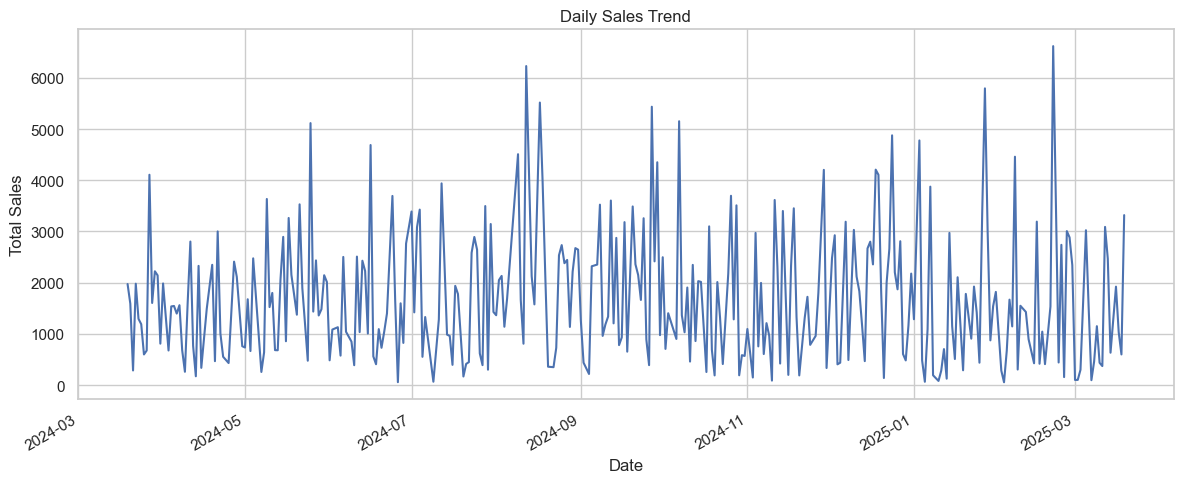

In [55]:
daily_sales = df.groupby('order_date')['total_price'].sum()
daily_sales.plot(figsize=(12, 5), title='Daily Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Category-wise Sales

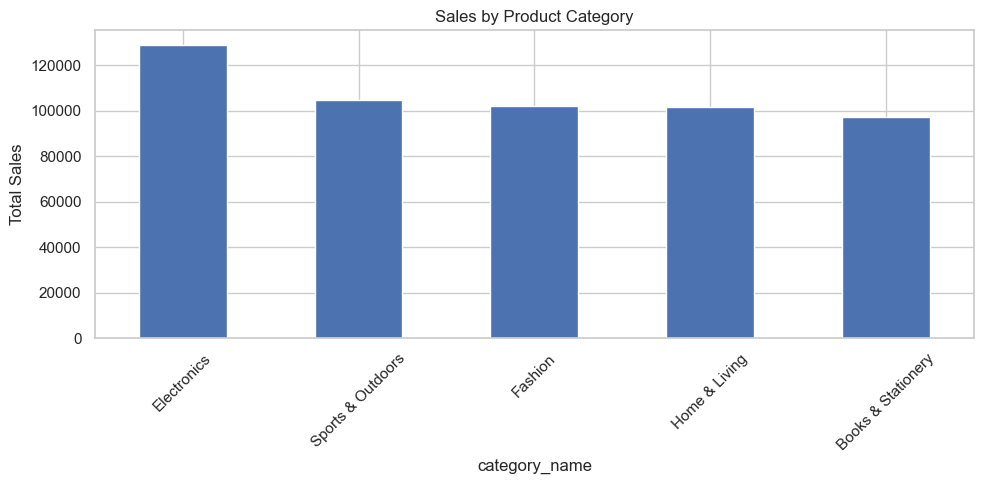

In [18]:
category_sales = df.groupby('category_name')['total_price'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Sales by Product Category', figsize=(10, 5))
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. City-wise Sales

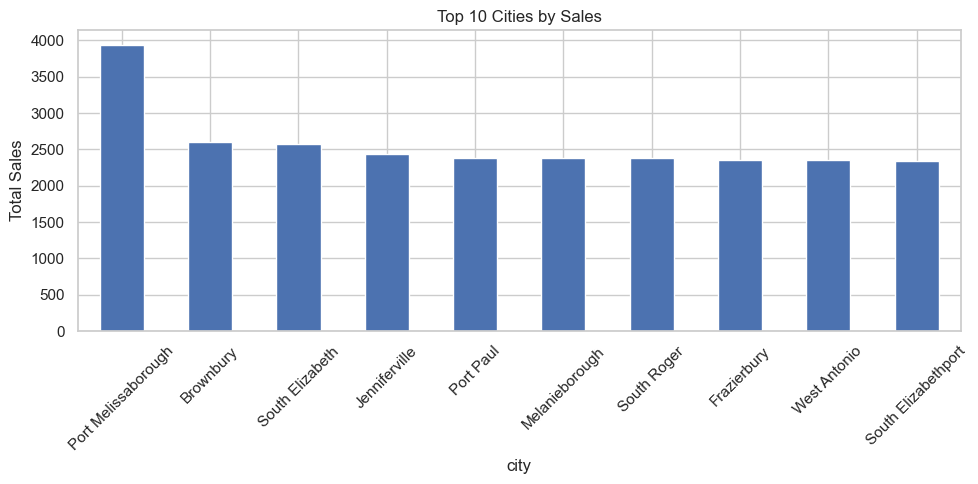

In [19]:
city_sales = df.groupby('city')['total_price'].sum().sort_values(ascending=False).head(10)
city_sales.plot(kind='bar', title='Top 10 Cities by Sales', figsize=(10, 5))
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Payment Method Distribution

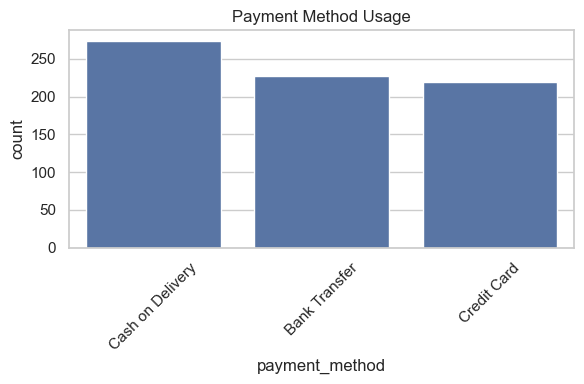

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='payment_method', data=df, order=df['payment_method'].value_counts().index)
plt.title('Payment Method Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Review Score Distribution 

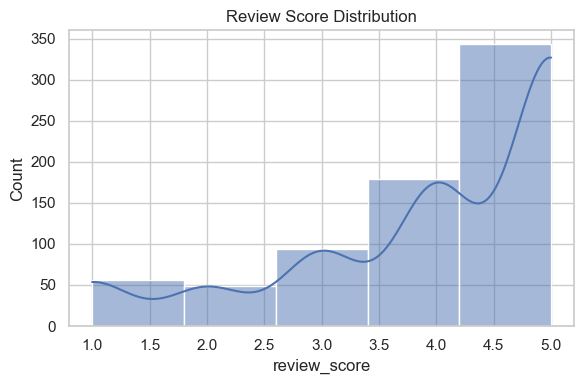

In [56]:
plt.figure(figsize=(6, 4))
sns.histplot(df['review_score'], bins=5, kde=True)
plt.title('Review Score Distribution')
plt.tight_layout()
plt.show()

## 10. Gender-wise Sales

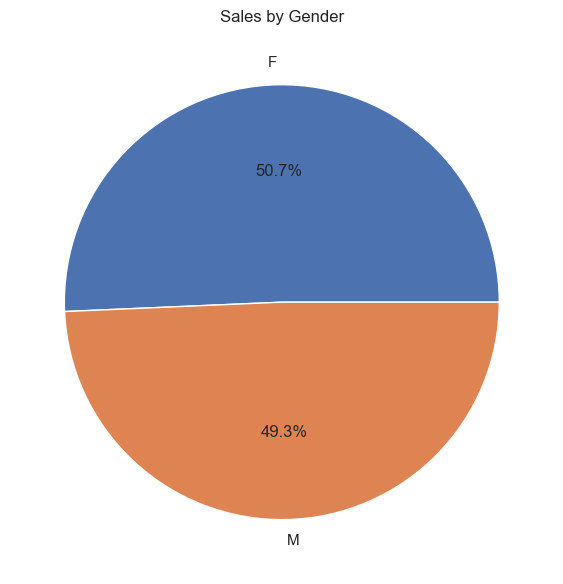

In [22]:
gender_sales = df.groupby('gender')['total_price'].sum()
gender_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Gender', figsize=(6, 6))
plt.ylabel('')
plt.tight_layout()
plt.show()

## 11. Age Distribution

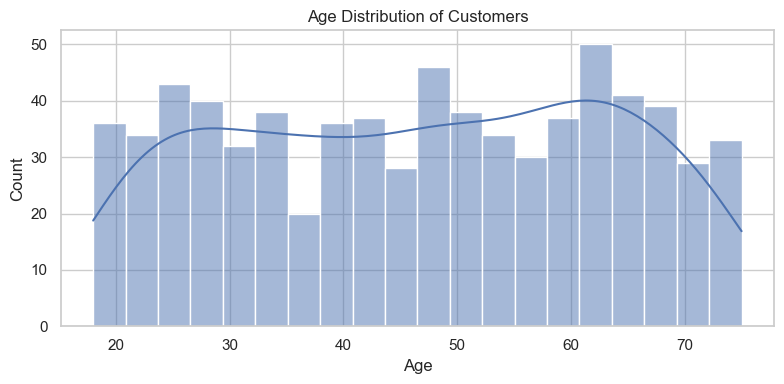

In [57]:
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

## 12. Correlation Heatmap

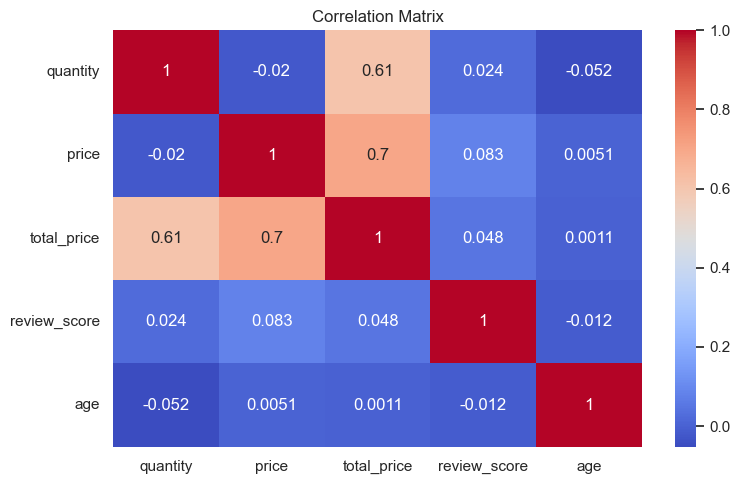

In [24]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['quantity', 'price', 'total_price', 'review_score', 'age']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()